<a href="https://colab.research.google.com/github/llpk79/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Paul_K_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Import packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('dark')

In [4]:
!curl 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data' -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0  49253      0 --:--:-- --:--:-- --:--:-- 49253


In [5]:
!head haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1


In [0]:
header = ['Age', 'Op Year', 'Num Nodes', 'Survival']
df = pd.read_csv('haberman.data', header=None, names=header)

In [7]:
df.shape

(306, 4)

Number of rows correct, and no missing data, according to UCI.  

In [8]:
df.head()

,Age,Op Year,Num Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Header looks good.

In [10]:
df.describe()

,Age,Op Year,Num Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [0]:
# Make 'Op Year' into datetime.
df['Op Year'] = df['Op Year'].map(lambda x: '19' + str(x))
df['Op Year'] = pd.to_datetime(df['Op Year'], infer_datetime_format=True)

#### Bellow lambda function corrected from sprint challenge submission.

In [0]:
# Change survival code as noted above.
df['Survival'] = df['Survival'].map(lambda x: 0 if x == 2.0 else x)

In [13]:
df.head()

,Age,Op Year,Num Nodes,Survival
0,30,1964-01-01,1,1
1,30,1962-01-01,3,1
2,30,1965-01-01,0,1
3,31,1959-01-01,2,1
4,31,1965-01-01,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [14]:
df.describe()

,Age,Num Nodes,Survival
count,306.000000,306.000000,306.000000
mean,52.457516,4.026144,0.735294
std,10.803452,7.189654,0.441899
min,30.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000
50%,52.000000,1.000000,1.000000
75%,60.750000,4.000000,1.000000
max,83.000000,52.000000,1.000000


A look at measures of central tendancy. We can plot these to better understand.

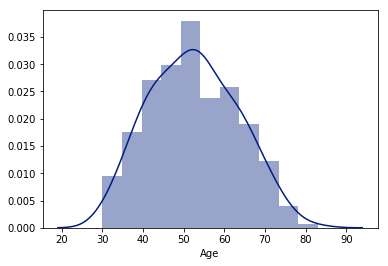

In [15]:
sns.distplot(df['Age']);

Age is normally distributed.

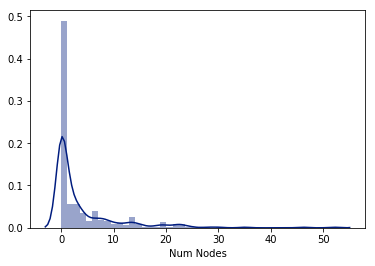

In [16]:
sns.distplot(df['Num Nodes']);

Heavily skewed with long right tail.

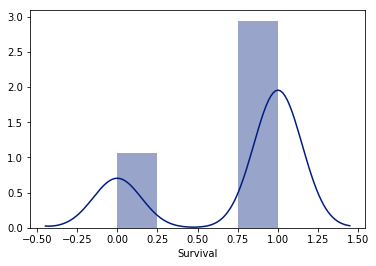

In [17]:
sns.distplot(df['Survival']);

Three fourths of patients survive to 5 years.

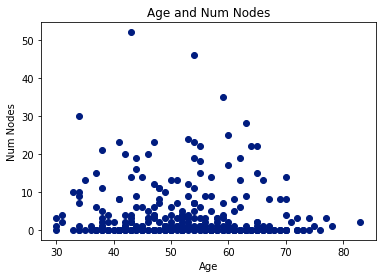

In [18]:
plt.scatter('Age', 'Num Nodes', data=df)
plt.title('Age and Num Nodes')
plt.xlabel('Age')
plt.ylabel('Num Nodes');

This looks interesting, but we can't see if the patient survived in this view.

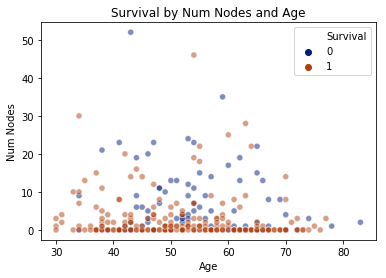

In [19]:
sns.scatterplot('Age', 'Num Nodes', hue='Survival', data=df, alpha=.5)
plt.title('Survival by Num Nodes and Age')
plt.xlabel('Age')
plt.ylabel('Num Nodes');

That's much better.

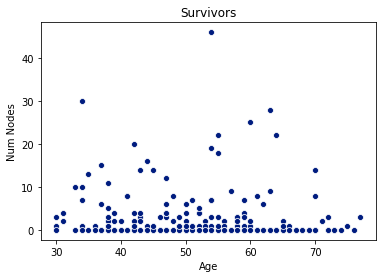

In [20]:
# Create a dataframe of survivors.
survived = df[df['Survival'] == 1]
sns.scatterplot('Age', 'Num Nodes', data=survived)
plt.title('Survivors');

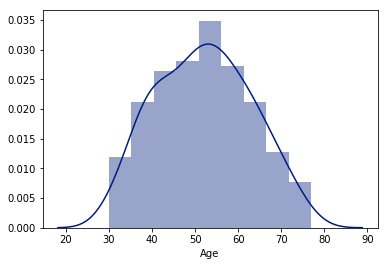

In [21]:
sns.distplot(survived['Age']);

About the same distribution as the whole data-set

In [0]:
# bin ages and number of nodes into equal sections.
ages = pd.cut(df['Age'], 5)
nodes = pd.cut(df['Num Nodes'], 5)

In [23]:
ct = pd.crosstab(df['Survival'], [nodes, ages])
ct

Num Nodes (-0.052, 10.4]                                                      \
Age       (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4] (72.4, 83.0]   
Survival                                                                       
0                      3           22           19           11            3   
1                     35           63           64           40            6   

Num Nodes   (10.4, 20.8]                                         \
Age       (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4]   
Survival                                                          
0                      0            6            5            4   
1                      3            5            2            1   

Num Nodes   (20.8, 31.2]                                        (31.2, 41.6]  \
Age       (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4] (51.2, 61.8]   
Survival                                                                       
0                      1            2            2            1            1   
1                      1            0            2            2            0   

Num Nodes (41.6, 52.0]               
Age       (40.6, 51.2] (51.2, 61.8]  
Survival                             
0                    1            0  
1                    0            1

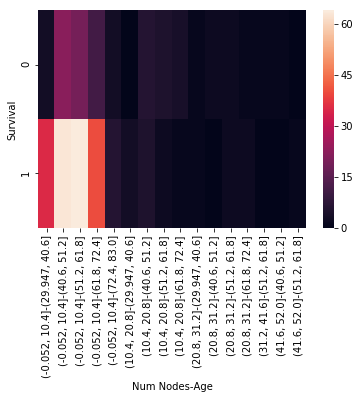

In [24]:
sns.heatmap(ct)

It looks like those with fewer nodes have the best chance at survival. Being middle or old aged looks like a good idea, too.

In [25]:
ct1 = pd.crosstab(nodes, df['Survival'])
ct1

Survival,0,1
Num Nodes,,
"(-0.052, 10.4]",58,208
"(10.4, 20.8]",15,11
"(20.8, 31.2]",6,5
"(31.2, 41.6]",1,0
"(41.6, 52.0]",1,1


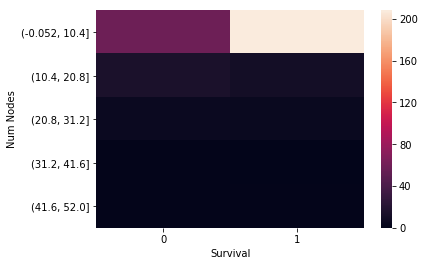

In [26]:
sns.heatmap(ct1)

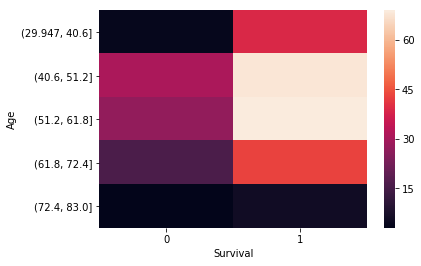

In [27]:
ct2 = pd.crosstab(ages, df['Survival'])
sns.heatmap(ct2)

In [0]:
# Make a column reflecting time since diagnosis.
today = pd.datetime.today()
df['Days since dx'] = (df['Op Year'] - today).dt.days

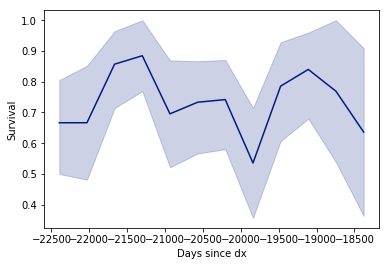

In [29]:
sns.lineplot('Days since dx', 'Survival', data=df)

There doesn't appear to be a strong relationship here. 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Being slightly older seems to give a slightly better chance of survival, but it isn't consistently, positively correlated.

Number of nodes has a negative relationship with survival.

I don't see a strong relationship between age and number of nodes, so I feel like I must be missing something based on the question. Also I'm out of time.
I do know cancers tend to be more agressive in young people, but not from this data.